# Homework 1, Problem 4: Integration

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def integrand(x):
    return np.square(np.sin(np.sqrt(100*x)))

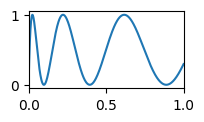

In [2]:
x = np.linspace(0,1,num=500)
y = integrand(x)
assert(len(x) == len(y))

fig, ax = plt.subplots()
fig.set_size_inches(2,1)

plt.plot(x, y)
plt.xlim(0,1)
plt.show()

In [3]:
def trapezoid_rule(left, right, integrand):
    width = right - left
    return (integrand(left) + integrand(right)) * width / 2

def half_the_trapezoid_width(a, b, num_subintervals, integrand, error, previous):
    width = (b-a)/num_subintervals
    lefts = np.linspace(a, b-width, num=num_subintervals)
    rights = np.linspace(a+width, b, num=num_subintervals)
    sum = np.sum(trapezoid_rule(lefts, rights, integrand))
    this_error = abs(previous - sum) / 3
    if this_error <= error:
        return sum, num_subintervals
    return half_the_trapezoid_width(a, b, num_subintervals*2, integrand, error, sum)

# method to calculate a definite integral given lower limit a, upper limit b, and integrand integrand
def adaptive_trapezoid_rule(a, b, integrand):
    first_estimate = trapezoid_rule(a, b, integrand)
    error = 1e-6
    return half_the_trapezoid_width(a, b, 2, integrand, error, first_estimate)


In [4]:
def half_the_trapezoid_width_spedup(a, b, num_subintervals, integrand, error, previous):
    width = (b-a)/num_subintervals
    midpoints = np.linspace(a+width, b-width, num=int(np.round(num_subintervals/2)))
    sum = previous/2 + width*np.sum(integrand(midpoints))
    this_error = abs(previous - sum) / 3
    if this_error <= error:
        return sum, num_subintervals
    return half_the_trapezoid_width(a, b, num_subintervals*2, integrand, error, sum)

def adaptive_trapezoid_rule_spedup(a, b, integrand):
    first_estimate = trapezoid_rule(a, b, integrand)
    error = 1e-6
    return half_the_trapezoid_width_spedup(a, b, 2, integrand, error, first_estimate)

integral, n = adaptive_trapezoid_rule(0,1,integrand)
print(f"Adaptive Trapezoid: {integral}\n{'':20}{n} subintervals")
integral, n = adaptive_trapezoid_rule_spedup(0,1,integrand)
print(f"{'Sped-up':>18}: {integral}\n{'':20}{n} subintervals")

from time import time
sum = [0,0]
functions = [adaptive_trapezoid_rule, adaptive_trapezoid_rule_spedup]
for i in range(10000):
    for j in range(2):
        begin = time()
        functions[j](0,1,integrand)
        end = time()
        sum[j] = end-begin
speedup_percent = (sum[1]/sum[0] - 1)*100
print(f"{'':20}{speedup_percent:.4f}% speedup")

Adaptive Trapezoid: 0.4558320582782708
                    4096 subintervals
           Sped-up: 0.4558320582782708
                    4096 subintervals
                    -1.3444% speedup
